Importing the Dependencies

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

Data Collection and Processing

In [7]:
big_mart_data = pd.read_csv('Train.csv')

In [8]:
big_mart_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [9]:
# number of data points & number of features
big_mart_data.shape

(8523, 12)

In [10]:
# getting some information about the dataset
big_mart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [11]:
# checking for missing values
big_mart_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [12]:
big_mart_data.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

Handling Missing Values

In [9]:
# mean value of "Item_Weight" column
big_mart_data['Item_Weight'].mean()

12.857645184136183

In [10]:
# filling the missing values in "Item_weight column" with "Mean" value
big_mart_data['Item_Weight'].fillna(big_mart_data['Item_Weight'].mean(), inplace=True)

In [11]:
big_mart_data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [12]:
# mode of "Outlet_Size" column
big_mart_data['Outlet_Size'].mode()

0    Medium
dtype: object

In [13]:
# filling the missing values in "Outlet_Size" column with Mode
mode_of_Outlet_size = big_mart_data.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))

In [14]:
print(mode_of_Outlet_size)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [15]:
miss_values = big_mart_data['Outlet_Size'].isnull()   
print(miss_values)

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool


In [16]:
big_mart_data.loc[miss_values, 'Outlet_Size'] = big_mart_data.loc[miss_values,'Outlet_Type'].apply(lambda x: mode_of_Outlet_size[x])

In [17]:
# checking for missing values
big_mart_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

EDA With Different Techniques

In [13]:
import dtale
dtale.show(big_mart_data)

In [5]:
import sweetviz as sv
#Generating Sweetviz report
report = sv.analyze(big_mart_data)
report.show_html("big_mart_data_report.html")

2022-04-25 11:39:35,154 - INFO     - NumExpr defaulting to 8 threads.


                                             |                                             | [  0%]   00:00 ->…

Report big_mart_data_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
Executing shutdown due to inactivity...


2022-04-25 12:37:22,671 - INFO     - Executing shutdown due to inactivity...


Executing shutdown...


2022-04-25 12:37:26,740 - INFO     - Executing shutdown...


Data Analysis

In [17]:
big_mart_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Numerical features

In [18]:
sns.set()

C:\Users\santo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



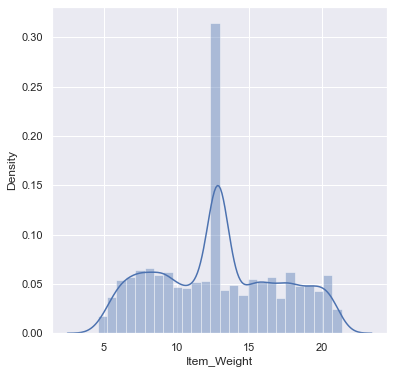

In [19]:
# Item_Weight distribution
plt.figure(figsize=(6,6))
sns.distplot(big_mart_data['Item_Weight'])
plt.show()

C:\Users\santo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



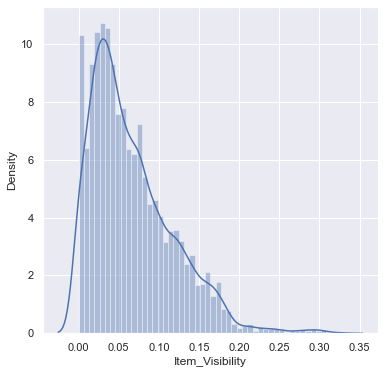

In [20]:
# Item Visibility distribution
plt.figure(figsize=(6,6))
sns.distplot(big_mart_data['Item_Visibility'])
plt.show()

C:\Users\santo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



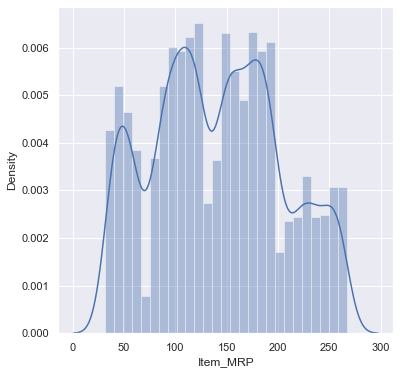

In [21]:
# Item MRP distribution
plt.figure(figsize=(6,6))
sns.distplot(big_mart_data['Item_MRP'])
plt.show()

C:\Users\santo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



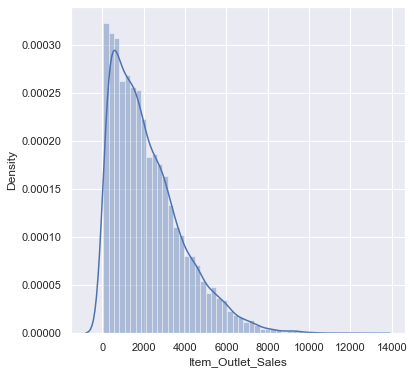

In [22]:
# Item_Outlet_Sales distribution
plt.figure(figsize=(6,6))
sns.distplot(big_mart_data['Item_Outlet_Sales'])
plt.show()

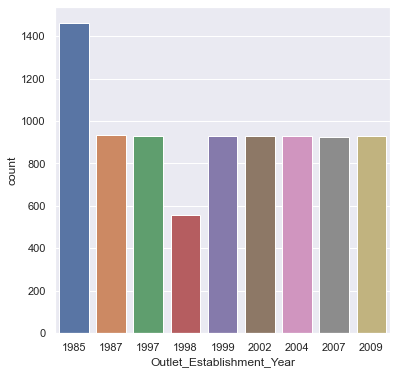

In [23]:
# Outlet_Establishment_Year column
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Establishment_Year', data=big_mart_data)
plt.show()

Categorical Features

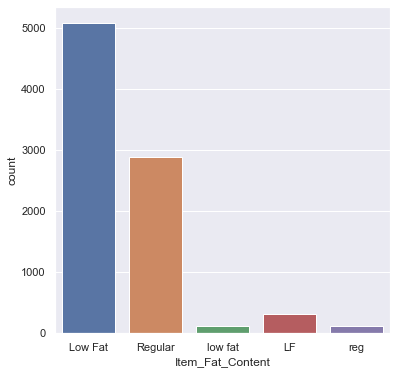

In [24]:
# Item_Fat_Content column
plt.figure(figsize=(6,6))
sns.countplot(x='Item_Fat_Content', data=big_mart_data)
plt.show()

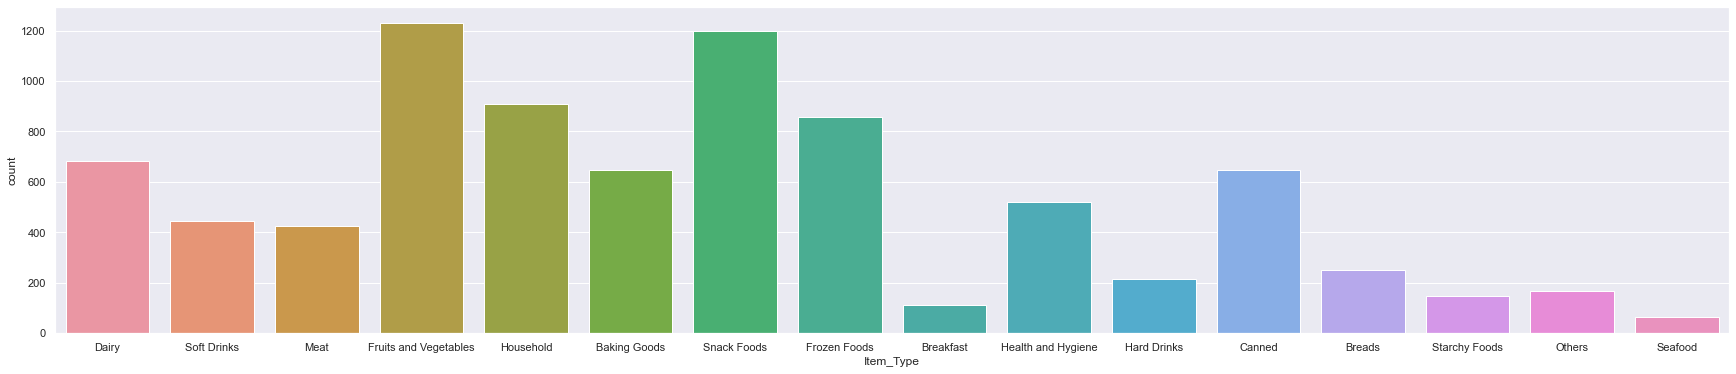

In [25]:
# Item_Type column
plt.figure(figsize=(30,6))
sns.countplot(x='Item_Type', data=big_mart_data)
plt.show()

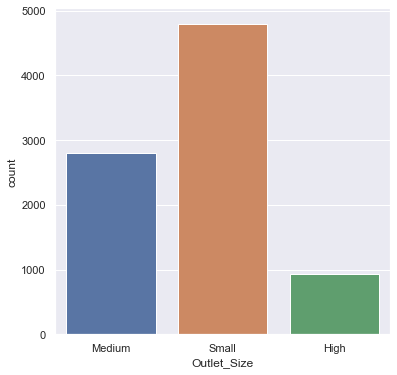

In [26]:
# Outlet_Size column
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Size', data=big_mart_data)
plt.show()

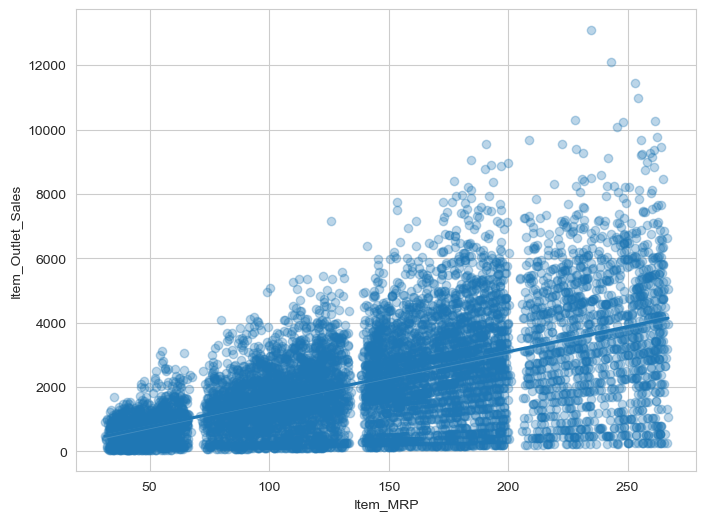

In [72]:
plt.figure(figsize=(8,6));
sns.set_style('whitegrid')
sns.regplot('Item_MRP', 'Item_Outlet_Sales', data=big_mart_data, x_jitter=0.3, scatter_kws={'alpha':0.3});


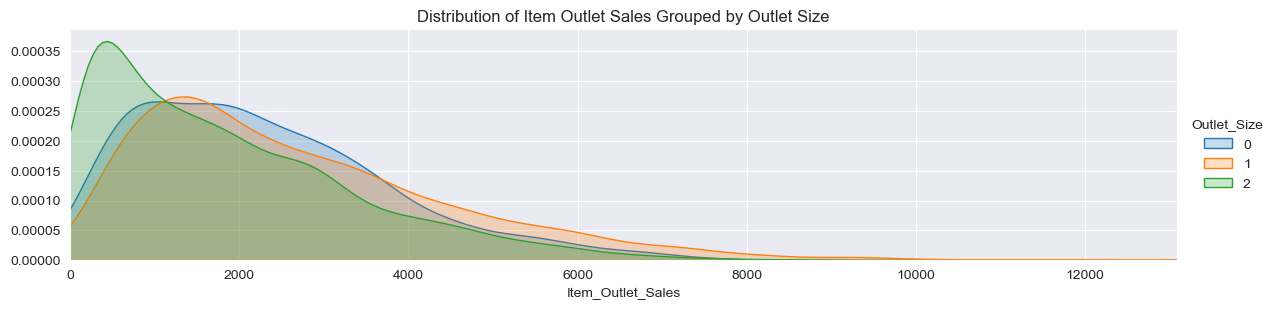

In [73]:
sns.set_style('darkgrid')
fig = sns.FacetGrid(big_mart_data, hue='Outlet_Size', aspect=4);
fig.map(sns.kdeplot, 'Item_Outlet_Sales', shade=True);
oldest = big_mart_data['Item_Outlet_Sales'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of Item Outlet Sales Grouped by Outlet Size');
fig.add_legend();

C:\Users\santo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



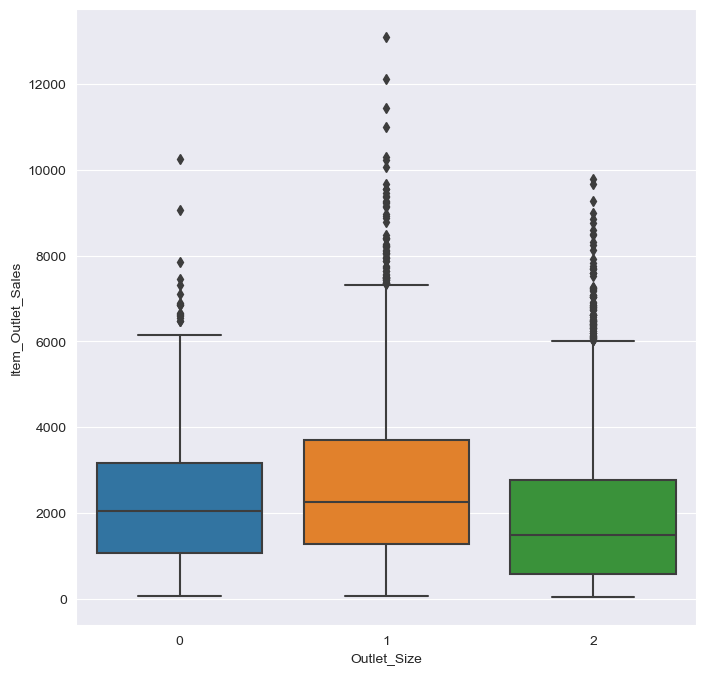

In [80]:
plt.figure(figsize=(8,8))
sns.boxplot('Outlet_Size', 'Item_Outlet_Sales', data=big_mart_data);

C:\Users\santo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



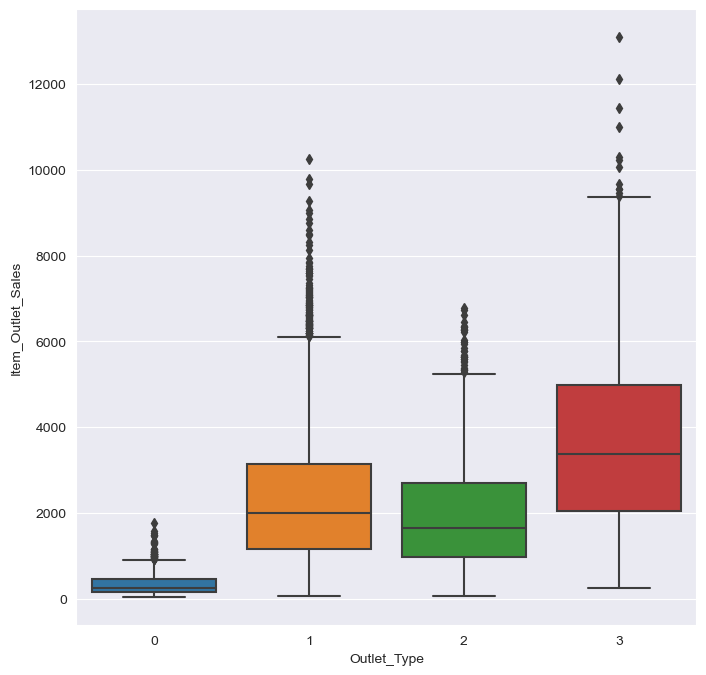

In [79]:
plt.figure(figsize=(8,8))
sns.boxplot('Outlet_Type', 'Item_Outlet_Sales', data=big_mart_data);

C:\Users\santo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



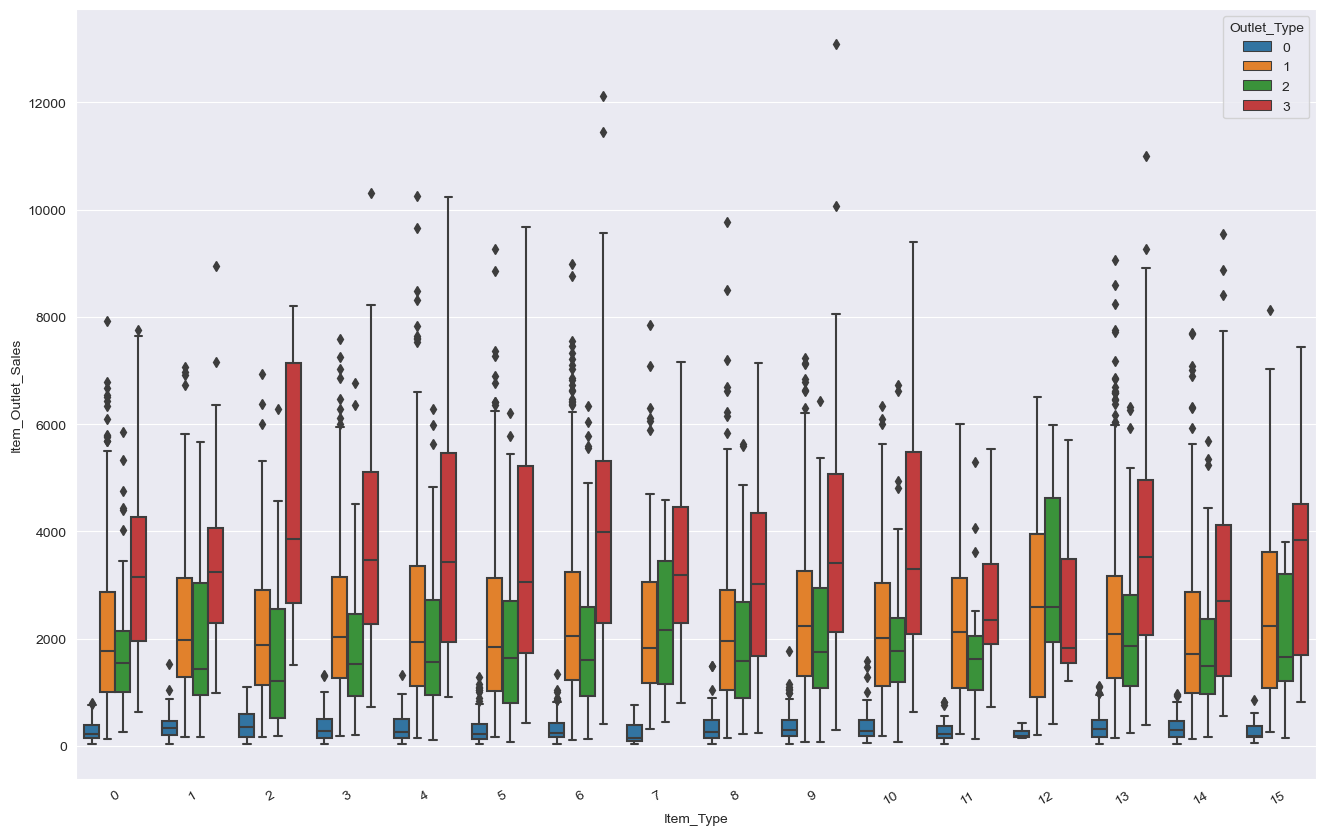

In [76]:
plt.figure(figsize=(16,10))
ax = sns.boxplot('Item_Type', 'Item_Outlet_Sales', data=big_mart_data, hue='Outlet_Type');
ax.set_xticklabels(ax.get_xticklabels(),rotation=30);

<AxesSubplot:>

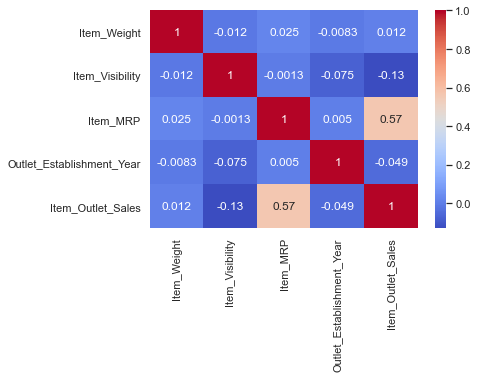

In [27]:
corr = big_mart_data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

Data Pre-Processing

In [29]:
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [18]:
big_mart_data['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [19]:
big_mart_data.replace({'Item_Fat_Content': {'low fat':'Low Fat','LF':'Low Fat', 'reg':'Regular'}}, inplace=True)

In [20]:
big_mart_data['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [21]:
big_mart_data.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

Label Encoding

In [22]:
encoder = LabelEncoder()

big_mart_data['Item_Fat_Content'] = encoder.fit_transform(big_mart_data['Item_Fat_Content'])

big_mart_data['Item_Type'] = encoder.fit_transform(big_mart_data['Item_Type'])

big_mart_data['Outlet_Size'] = encoder.fit_transform(big_mart_data['Outlet_Size'])

big_mart_data['Outlet_Location_Type'] = encoder.fit_transform(big_mart_data['Outlet_Location_Type'])

big_mart_data['Outlet_Type'] = encoder.fit_transform(big_mart_data['Outlet_Type'])

In [23]:
big_mart_data

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,0,0.016047,4,249.8092,1999,1,0,1,3735.1380
1,5.920,1,0.019278,14,48.2692,2009,1,2,2,443.4228
2,17.500,0,0.016760,10,141.6180,1999,1,0,1,2097.2700
3,19.200,1,0.000000,6,182.0950,1998,2,2,0,732.3800
4,8.930,0,0.000000,9,53.8614,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,13,214.5218,1987,0,2,1,2778.3834
8519,8.380,1,0.046982,0,108.1570,2002,2,1,1,549.2850
8520,10.600,0,0.035186,8,85.1224,2004,2,1,1,1193.1136
8521,7.210,1,0.145221,13,103.1332,2009,1,2,2,1845.5976


Splitting features and Target

In [24]:
X = big_mart_data.drop(columns='Item_Outlet_Sales', axis=1)
Y = big_mart_data['Item_Outlet_Sales']

In [25]:
X

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.300,0,0.016047,4,249.8092,1999,1,0,1
1,5.920,1,0.019278,14,48.2692,2009,1,2,2
2,17.500,0,0.016760,10,141.6180,1999,1,0,1
3,19.200,1,0.000000,6,182.0950,1998,2,2,0
4,8.930,0,0.000000,9,53.8614,1987,0,2,1
...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,13,214.5218,1987,0,2,1
8519,8.380,1,0.046982,0,108.1570,2002,2,1,1
8520,10.600,0,0.035186,8,85.1224,2004,2,1,1
8521,7.210,1,0.145221,13,103.1332,2009,1,2,2


In [26]:
Y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

Splitting the data into Training data & Testing Data

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [28]:
print(X.shape, X_train.shape, X_test.shape)

(8523, 9) (6818, 9) (1705, 9)


Machine Learning Model Training

XGBoost Regressor

In [30]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
regressor = XGBRegressor()
regressor.fit(X_train, Y_train)
# prediction on training data
training_data_prediction = regressor.predict(X_train)
test_data_prediction=regressor.predict(X_test)
# R squared Value
r2_train = metrics.r2_score(Y_test, test_data_prediction)
print('R Squared value = ', r2_train)
print(mean_absolute_error(Y_test,test_data_prediction))
print(np.sqrt(mean_squared_error(Y_test,test_data_prediction)))
print(mean_squared_error(Y_test,test_data_prediction))

R Squared value =  0.5388106064765372
841.8626915516405
1193.1999469833072
1423726.1134809672


In [31]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train_std= sc.fit_transform(X_train)
X_test_std= sc.transform(X_test)
X_train_std
X_test_std

array([[ 0.00834025, -0.73325542,  0.65218954, ..., -0.66836447,
         1.09868919,  2.27771359],
       [-0.15882899, -0.73325542,  1.26795963, ...,  0.79358899,
        -0.13295548, -0.24534917],
       [-1.65890937, -0.73325542,  1.26359938, ...,  0.79358899,
        -0.13295548, -0.24534917],
       ...,
       [ 1.48299127, -0.73325542,  2.17761528, ...,  0.79358899,
        -0.13295548, -0.24534917],
       [ 1.38849802, -0.73325542, -1.28549807, ..., -0.66836447,
         1.09868919,  1.01618221],
       [-1.4274009 ,  1.36378126,  0.38478172, ...,  0.79358899,
        -0.13295548, -0.24534917]])

In [32]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
lr.fit(X_train_std,Y_train)
Y_pred_lr=lr.predict(X_test_std)
print(Y_pred_lr)
Y_test
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print(r2_score(Y_test,Y_pred_lr))
print(mean_absolute_error(Y_test,Y_pred_lr))
print(np.sqrt(mean_squared_error(Y_test,Y_pred_lr)))
print(mean_squared_error(Y_test,Y_pred_lr))

[2522.18517611 3499.06247572 1040.50420875 ... 2257.52587243 4631.43454119
 3338.87887193]
0.4862438042517586
947.0918506944608
1259.36641182743
1586003.7592390962


In [37]:
#ridge regression
from sklearn.linear_model import Ridge
rr = Ridge(alpha=0.1)
rr.fit(X_train, Y_train) 
pred_test_rr= rr.predict(X_test)
print("RMSE : ",np.sqrt(mean_squared_error(Y_test,pred_test_rr)))
print("r2 score : ",r2_score(Y_test, pred_test_rr))
print(mean_absolute_error(Y_test,pred_test_rr))

RMSE :  1259.3785063256894
r2 score :  0.4862339363480356
947.1078955416972


In [ ]:
X_test.head()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor(n_estimators=1000)
rf.fit(X_train_std,Y_train)
Y_pred_rf= rf.predict(X_test_std)
print(r2_score(Y_test,Y_pred_rf))
print(mean_absolute_error(Y_test,Y_pred_rf))
print(mean_squared_error(Y_test,Y_pred_rf))
print(np.sqrt(mean_squared_error(Y_test,Y_pred_rf)))

In [63]:
# Fitting Decision Tree Regression to the dataset
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(max_depth=200,min_samples_leaf=500)
regressor.fit(X_train, Y_train)
# Predicting the test set results
y_pred12 = regressor.predict(X_test)

print(r2_score(Y_train, regressor.predict(X_train)))
print(mean_absolute_error(Y_test,y_pred12))
print(mean_squared_error(Y_test,y_pred12))
print(np.sqrt(mean_squared_error(Y_test,y_pred12)))

0.4097343008926043
1024.97521777387
1920940.791984136
1385.9800835452636


In [56]:
import joblib

In [61]:
joblib.dump(sc,r'C:\Users\santo\OneDrive\Desktop\Big Mart Sales\models\sc.sav')

['C:\\Users\\santo\\OneDrive\\Desktop\\Big Mart Sales\\models\\sc.sav']

In [62]:
joblib.dump(rf,r'C:\Users\santo\OneDrive\Desktop\Big Mart Sales\models\rf.sav')

['C:\\Users\\santo\\OneDrive\\Desktop\\Big Mart Sales\\models\\rf.sav']